In [1]:
library(tidyverse)
library(lubridate)
options(
    scipen = 999,
    repr.matrix.max.rows = 1000,
    repr.matrix.max.cols = 100,
    repr.plot.width = 25,
    repr.plot.height = 10
)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Load data

In [2]:
releases_types <- cols(
  .default = col_character()
)
releases <- read_csv("data/nhs-data-release-register-releases.csv", col_types = releases_types) |>
    left_join(read_csv("data/date-ranges.csv", col_types = cols()), by = "fileName") |>
    left_join(read_csv("data/supplementary-names.csv", col_types = cols()), by = "organisationName") |>
    left_join(read_csv("data/supplementary-details.csv", col_types = cols()), by = "organisationNameNice") |>
    mutate(date_range = str_c(format(dateFrom, format = "%Y-%m-%d"), " to ", format(dateTo, format = "%Y-%m-%d"))) |>
    mutate(optOutsApplied_boolean = str_detect(optOutsApplied, "^Y"))
releases |> count()
# 207,542

n
<int>
207542


## Validation

In [3]:
# check there aren't any uncategorised organisations
releases |>
    filter(is.na(organisationCategory)) |>
    count()
# should be zero!

n
<int>
0


In [4]:
# check there aren't any releases without date ranges
releases |>
    filter(is.na(dateFrom)) |>
    count()
# should be zero!

n
<int>
0


In [5]:
# check there aren't any companies or charities without supplementary details
releases |>
    filter(organisationCategory == "Company" | organisationCategory == "Charity") |>
    filter(is.na(organisationNameNice)) |>
    group_by(organisationName) |>
    summarise() |>
    ungroup() |>
    count()
# should be zero!

n
<int>
0


In [6]:
# check data from all 39 files is included
releases |>
    group_by(fileName, fileTitle, dateFrom, dateTo) |>
    summarise(n()) |>
    arrange(desc(dateFrom))

`summarise()` has grouped output by 'fileName', 'fileTitle', 'dateFrom'. You can override using the `.groups` argument.



fileName,fileTitle,dateFrom,dateTo,n()
<chr>,<chr>,<date>,<date>,<int>
releaseregister_20210501_20210531.xlsx,May 2021,2021-05-01,2021-05-31,4424
releaseregister_20210401_20210430.xlsx,1 April 2021 to 30 April 2021,2021-04-01,2021-04-30,4659
releaseregister_20210301_20210331.xlsx,1 March 2021 to 31 March 2021,2021-03-01,2021-03-31,5150
releaseregister_20210201_20210228.xlsx,1 February 2021 to 28 February 2021,2021-02-01,2021-02-28,5079
releaseregister_20210101_20210131.xlsx,1 January 2021 to 31 January 2021,2021-01-01,2021-01-31,5036
releaseregister_20201201_20201231.xlsx,1 December to 31 December 2020,2020-12-01,2020-12-31,5254
releaseregister_20201101_20201130.xlsx,1 November to 30 November 2020,2020-11-01,2020-11-30,4330
register-of-approved-data-releases-october-2020.xlsx,1 October to 30 October 2020,2020-10-01,2020-10-31,4709
releaseregister_20200901_20200930.xlsx,1 September to 30 September 2020,2020-09-02,2020-09-30,4921


## Question: who is getting this data?

In [7]:
# other than NHS bodies, what proportions of the data shared went to the different types of organisation?
releases |>
    filter(organisationCategory != "NHS") |>
    group_by(organisationCategory) |>
    summarise(count = n()) |>
    mutate(percentage = count / sum(count) * 100) |>
    arrange(desc(percentage))

organisationCategory,count,percentage
<chr>,<int>,<dbl>
Local authority,30438,49.237290
Academia,11796,19.081512
Government,9026,14.600689
Company,7822,12.653068
Charity,2737,4.427441


In [8]:
# how many companies have received data, going back to the start of records, April 2016?
releases |>
    filter(organisationCategory == "Company") |>
    summarise(count = n_distinct(organisationNameNice))
# 43

count
<int>
43


In [9]:
# how many companies have recieved data in Q1 of 2021?
releases |>
    filter(organisationCategory == "Company") |>
    filter(dateFrom >= as.Date("2021-01-01") & dateTo < as.Date("2021-04-01")) |>
    summarise(count = n_distinct(organisationNameNice))
# 17

count
<int>
17


In [10]:
# how many companies have received data during the pandemic period?
releases |>
    filter(organisationCategory == "Company") |>
    filter(dateFrom >= as.Date("2020-04-01")) |>
    summarise(count = n_distinct(organisationNameNice))
# 29

count
<int>
29


In [11]:
# how many companies recieved data in 2019?
releases |>
    filter(organisationCategory == "Company") |>
    filter(dateFrom >= as.Date("2019-01-01") & dateTo < as.Date("2020-01-01")) |>
    summarise(count = n_distinct(organisationNameNice))
# 21

count
<int>
21


`summarise()` has grouped output by 'period'. You can override using the `.groups` argument.



organisationCategory,Pandemic,Pre-pandemic
<chr>,<int>,<int>
Local authority,10635,10107
Government,4502,2315
Academia,2809,2829
Company,2292,1535
Charity,712,804


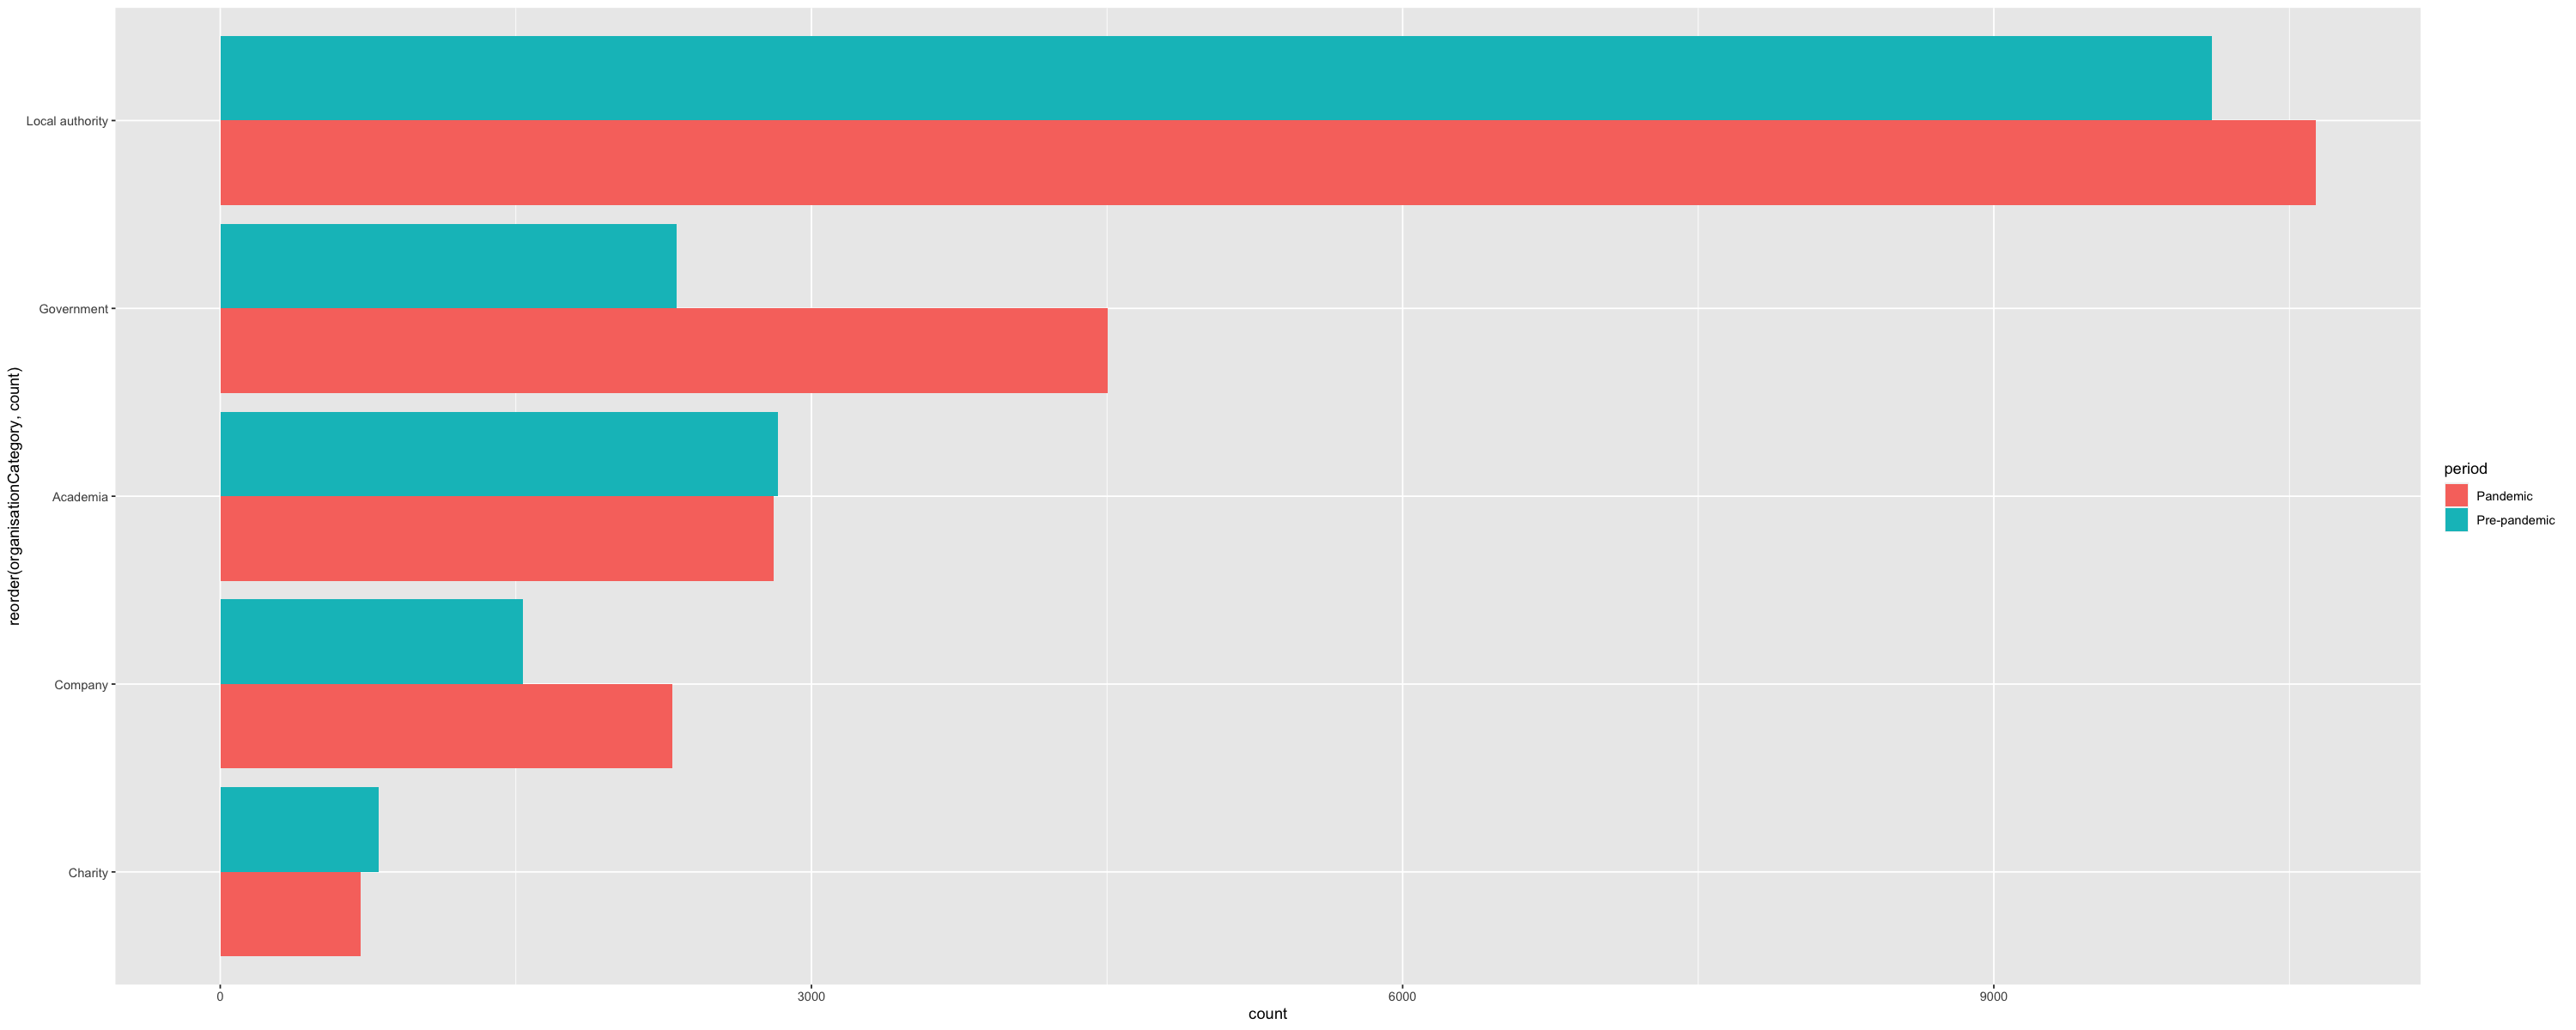

In [12]:
# which types of organisation received this data, other than the NHS -- during the pandemic and pre-pandemic?
recipient_groups <- releases |>
    filter(dateFrom >= as.Date("2019-02-01")) |>
    filter(organisationCategory != "NHS") |>
    mutate(period = if_else(dateFrom < as.Date("2020-04-01"), "Pre-pandemic", "Pandemic")) |>
    group_by(period, organisationCategory) |>
    summarise(count = n()) 
recipient_groups|>
    arrange(organisationCategory, period) |>
    pivot_wider(names_from = period, values_from = count) |>
    arrange(desc(Pandemic))
recipient_groups |>
    ggplot(aes(x = reorder(organisationCategory, count), y = count, fill = period)) + 
    geom_bar(stat = "identity", position = "dodge") +
    coord_flip()

In [13]:
# for the companies and charities, who are the biggest recipients of data, and what types of business were they -- during the pandemic and before?
# write out data for treemap graphic
releases |>
    filter(dateFrom >= as.Date("2019-02-01")) |> # so we have two equal 14-month periods, pandemic and pre-pandemic
    filter(organisationCategory == "Company" | organisationCategory == "Charity") |>
    mutate(group = case_when(
        organisationCategory == "Charity" ~ "Charity",
        organisationCategory == "Company" ~ organisationSubcategory
    )) |>
    mutate(period = if_else(dateFrom < as.Date("2020-04-01"), "Pre-pandemic", "Pandemic")) |>
    group_by(period, group, organisationNameNice, organisationNameShort, organisationDescription) |>
    summarise(
        organisation_name_listed_as = paste0(sort(unique(str_to_upper(organisationName))), collapse = "; "),
        number_of_releases = n(),
        dates = if_else(
            format(first(sort(dateFrom)), format = "%B %Y") == format(last(sort(dateFrom)), format = "%B %Y"),
            str_c("in ", first(sort(unique(format(dateFrom, format = "%B %Y")))), sep = ""),
            str_c("between ", format(first(sort(dateFrom)), format = "%B %Y"), " and ", format(last(sort(dateFrom)), format = "%B %Y"), sep = "")
        ),
        number_of_files_found_in = length(unique(date_range))
    ) |>
    ungroup() |>
    arrange(period, group) |>
    write_csv("treemap.csv", na = "")

`summarise()` has grouped output by 'period', 'group', 'organisationNameNice', 'organisationNameShort'. You can override using the `.groups` argument.



In [14]:
# how many releases went to Iqvia in 2020?
releases |>
    filter(year(dateFrom) == "2020") |>
    filter(organisationNameNice == "IQVIA") |>
    summarise(
        number_of_releases = n(),
        number_of_projects = n_distinct(nicNumber)
    )

number_of_releases,number_of_projects
<int>,<int>
487,7


# Question: what data is being released?

In [15]:
# excluding releases to NHS bodies, how datasets have been released, overall?
releases |>
    filter(organisationCategory != "NHS") |>
    group_by(dataType) |>
    summarise(count = n()) |>
    arrange(desc(count)) |>
    ungroup() |>
    count()
# 100

n
<int>
100


In [16]:
# excluding releases to NHS bodies, which datasets have been released?
releases |>
    filter(organisationCategory != "NHS") |>
    group_by(dataType) |>
    summarise(number_of_releases = n()) |>
    arrange(desc(number_of_releases)) |>
    write_csv("dataset-names.csv")

## Question: are more private companies getting this data than before the pandemic?

In [17]:
# have more companies recieved data during the pandemic?
releases |>
    filter(dateFrom >= as.Date("2017-12-01")) |> # so we have three equal 14-month periods, pandemic, pre-pandemic and pre-pre-pandemic
    filter(organisationCategory == "Company") |>
    mutate(period = case_when(
        dateFrom < as.Date("2019-02-01") ~ "Pre-pre-pandemic (December 2017 to January 2019)",
        dateFrom < as.Date("2020-04-01") ~ "Pre-pandemic (February 2019 to April 2020)",
        TRUE ~ "Pandemic (April 2020 to May 2021)"
    )) |>
    group_by(period) |>
    summarise(
        number_of_releases = n(),
        number_of_companies = n_distinct(organisationNameNice)
    )

period,number_of_releases,number_of_companies
<chr>,<int>,<int>
Pandemic (April 2020 to May 2021),2292,29
Pre-pandemic (February 2019 to April 2020),1535,21
Pre-pre-pandemic (December 2017 to January 2019),2044,26


In [18]:
# which subcategories of organisations have been receiving data, comparing pre-pandemic with the pandemic period?
releases |>
    filter(dateFrom >= as.Date("2019-02-01")) |> # so we have two equal 14-month periods, pandemic and pre-pandemic
    filter(organisationCategory == "Company" | organisationCategory == "Charity") |>
    mutate(period = if_else(dateFrom < as.Date("2020-04-01"), "Pre-pandemic (February 2019 to April 2020)", "Pandemic (April 2020 to May 2021)")) |>
    mutate(group = case_when(
        organisationCategory == "Charity" ~ "Charity",
        organisationCategory == "Company" ~ organisationSubcategory
    )) |>
    group_by(period, group) |>
    summarise(number_of_releases = n()) |>
    mutate(percentage_of_releases = number_of_releases / sum(number_of_releases) * 100) |>
    arrange(period, group)

`summarise()` has grouped output by 'period'. You can override using the `.groups` argument.



period,group,number_of_releases,percentage_of_releases
<chr>,<chr>,<int>,<dbl>
Pandemic (April 2020 to May 2021),Charity,712,23.701731
Pandemic (April 2020 to May 2021),Consulting,19,0.632490
Pandemic (April 2020 to May 2021),Medical analytics,2008,66.844208
Pandemic (April 2020 to May 2021),Other,209,6.957390
Pandemic (April 2020 to May 2021),Pharmaceutical,56,1.864181
Pre-pandemic (February 2019 to April 2020),Charity,804,34.373664
Pre-pandemic (February 2019 to April 2020),Consulting,177,7.567336
Pre-pandemic (February 2019 to April 2020),Medical analytics,1227,52.458316
Pre-pandemic (February 2019 to April 2020),Other,131,5.600684


In [19]:
# are third parties receiving more data releases, looking back over time?
releases |>
    filter(dateFrom >= as.Date("2017-12-01")) |> # so we have three equal 14-month periods, pandemic, pre-pandemic and pre-pre-pandemic
    mutate(period = case_when(
        dateFrom < as.Date("2019-02-01") ~ "Pre-pre-pandemic (December 2017 to January 2019)",
        dateFrom < as.Date("2020-04-01") ~ "Pre-pandemic (February 2019 to April 2020)",
        TRUE ~ "Pandemic (April 2020 to May 2021)"
    )) |>
    group_by(organisationCategory, period) |>
    summarise(number_of_releases = n())

`summarise()` has grouped output by 'organisationCategory'. You can override using the `.groups` argument.



organisationCategory,period,number_of_releases
<chr>,<chr>,<int>
Academia,Pandemic (April 2020 to May 2021),2809
Academia,Pre-pandemic (February 2019 to April 2020),2829
Academia,Pre-pre-pandemic (December 2017 to January 2019),2364
Charity,Pandemic (April 2020 to May 2021),712
Charity,Pre-pandemic (February 2019 to April 2020),804
Charity,Pre-pre-pandemic (December 2017 to January 2019),459
Company,Pandemic (April 2020 to May 2021),2292
Company,Pre-pandemic (February 2019 to April 2020),1535
Company,Pre-pre-pandemic (December 2017 to January 2019),2044


## Question: how often are opt-outs applied?

In [20]:
# excluding data going to NHS bodies, how often were opt-outs applied overall?
releases |>
    filter(organisationCategory != "NHS") |>
    group_by(optOutsApplied_boolean) |>
    summarise(count = n()) |>
    mutate(percentage = count / sum(count) * 100) |>
    arrange(desc(percentage))
# so only 16% of releases applied opt-outs

optOutsApplied_boolean,count,percentage
<lgl>,<int>,<dbl>
FALSE,52101,84.27991
TRUE,9718,15.72009


In [21]:
# for companies how often were opt-outs applied?
releases |>
    filter(organisationCategory == "Company") |>
    group_by(optOutsApplied_boolean) |>
    summarise(count = n()) |>
    mutate(percentage = count / sum(count) * 100) |>
    arrange(desc(percentage))

optOutsApplied_boolean,count,percentage
<lgl>,<int>,<dbl>
FALSE,6954,88.90309
TRUE,868,11.09691


`summarise()` has grouped output by 'optOutsApplied_boolean'. You can override using the `.groups` argument.



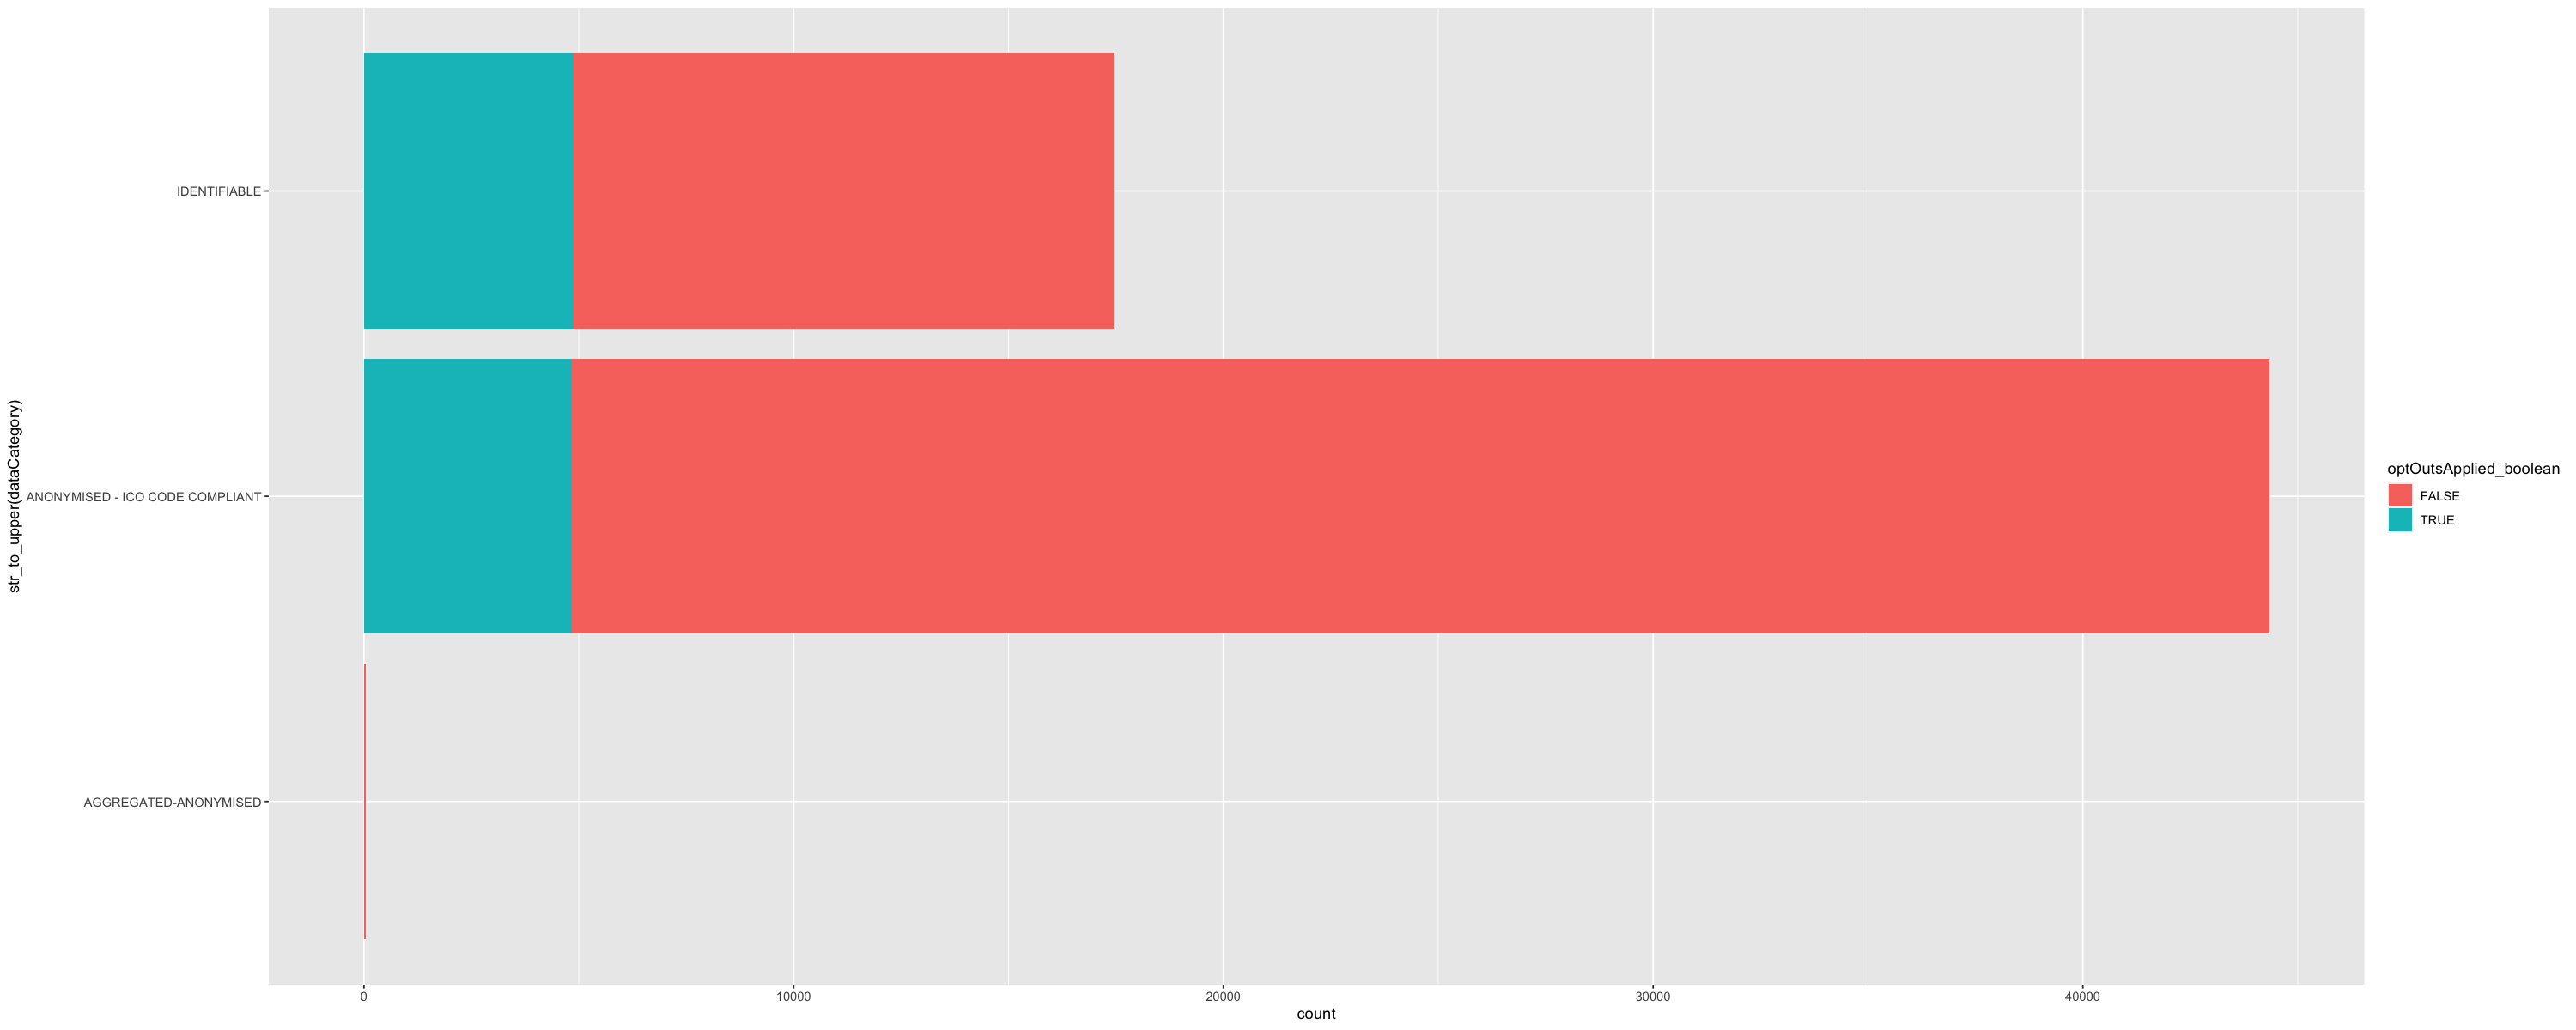

In [22]:
# excluding data going to NHS bodies, how often were opt-outs applied, split by whether the data was identifiable or not?
releases |>
    filter(organisationCategory != "NHS") |>
    group_by(optOutsApplied_boolean, str_to_upper(dataCategory)) |>
    summarise(count = n()) |>
    ggplot(aes(x = `str_to_upper(dataCategory)`, y = count, fill = optOutsApplied_boolean)) +
    geom_bar(stat = "identity") +
    coord_flip()
# ~28% of *identifiable* releases applied opt-outs
# ~11% of anonymised releases applied opt-outs
# but there are far more anonymised data releases than identifiable

`summarise()` has grouped output by 'dataIsSensitive'. You can override using the `.groups` argument.



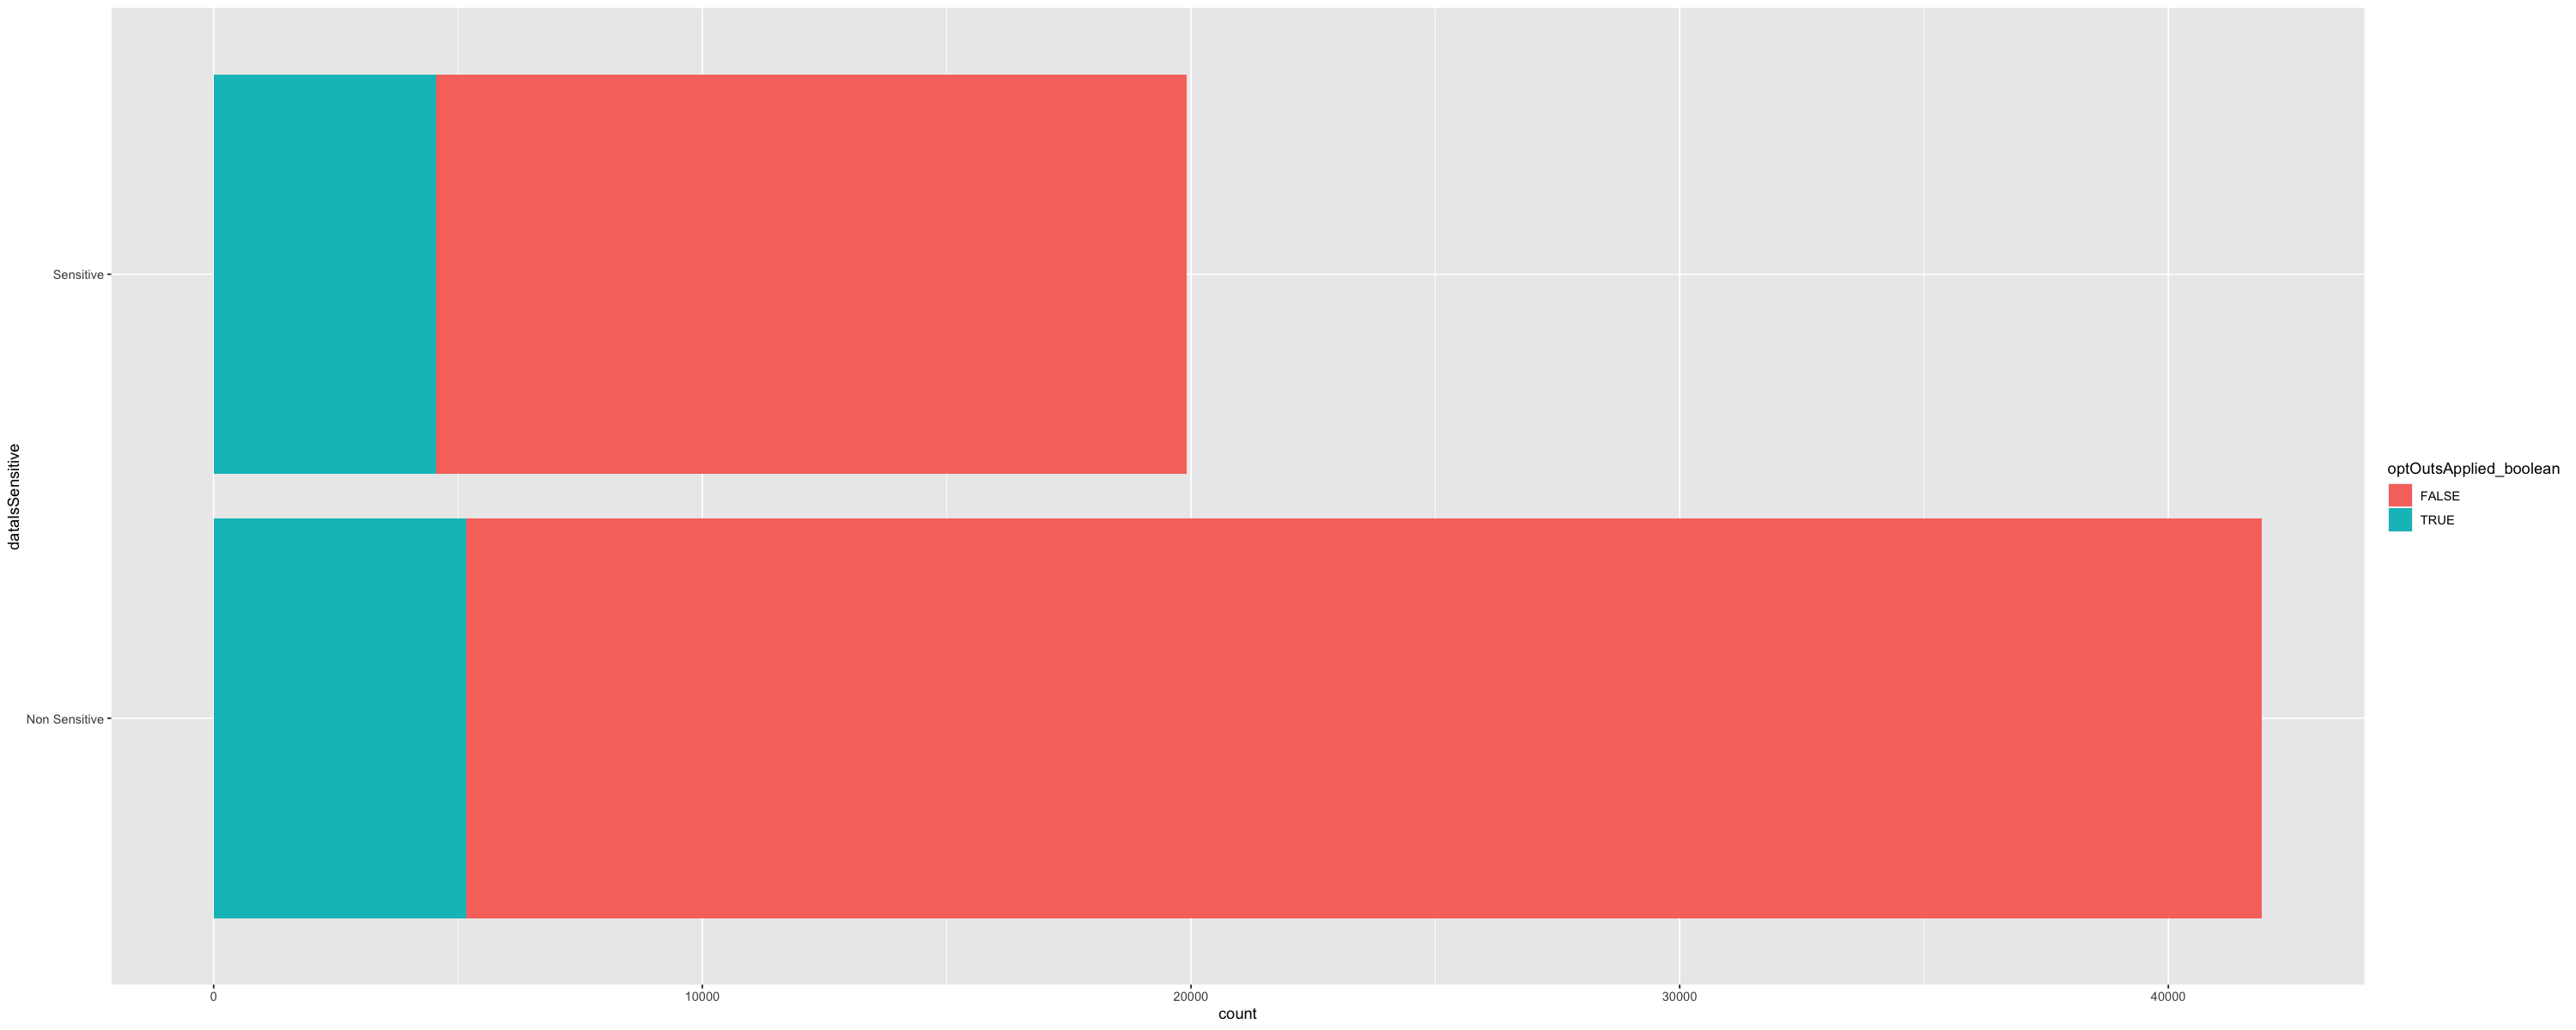

In [23]:
# excluding data going to NHS bodies, how often were opt-outs applied, split by whether the data was sensitive or not?
releases |>
    filter(organisationCategory != "NHS") |>
    group_by(dataIsSensitive, optOutsApplied_boolean) |>
    summarise(count = n()) |>
    ggplot(aes(x = dataIsSensitive, y = count, fill = optOutsApplied_boolean)) + 
    geom_bar(stat = "identity") +
    coord_flip()
# ~23% of sensitive data releases had opt-outs applied
# ~12% of non-sensitive data releases had opt-outs applied
# but there are far more non-sensitive data releases

In [24]:
# excluding data going to NHS bodies, what reasons were given for opt-outs not being applied, overall?
releases |>
    filter(organisationCategory != "NHS") |>
    filter(optOutsApplied_boolean == FALSE) |>
    group_by(optOutsApplied) |>
    summarise(count = n()) |>
    mutate(percentage = count / sum(count) * 100) |>
    arrange(desc(percentage))

optOutsApplied,count,percentage
<chr>,<int>,<dbl>
No - data flow is not identifiable,27727,53.21778853
N,14929,28.65396058
No - deaths data flowing to Local Authorities does not require the application of patient opt outs,3543,6.80025335
No - consent provided by participants of research study,2567,4.92696877
No - Statutory exemption to flow confidential data without consent,1388,2.66405635
"No - Birth data is not considered as personal confidential information - however when handling applications for the data we treat these data as identifiable, even though patient opt outs do not apply",1057,2.02875185
No - NHS Digital are statutorily obliged to provide the data to the CQC,360,0.69096562
No - not applicable for this dataset,219,0.42033742
No - flow to PHE under a memorandum of understanding,189,0.36275695


In [25]:
# excluding data going to NHS bodies, what reasons were given for opt-outs not being applied, for identifiable releases?
releases |>
    filter(organisationCategory != "NHS") |>
    filter(str_to_upper(dataCategory) == "IDENTIFIABLE") |>
    filter(optOutsApplied_boolean == FALSE) |>
    group_by(optOutsApplied) |>
    summarise(count = n()) |>
    mutate(percentage = count / sum(count) * 100) |>
    arrange(desc(percentage))

optOutsApplied,count,percentage
<chr>,<int>,<dbl>
No - deaths data flowing to Local Authorities does not require the application of patient opt outs,3543,28.2041076
N,3197,25.4497691
No - consent provided by participants of research study,2547,20.2754338
No - Statutory exemption to flow confidential data without consent,1328,10.5715650
"No - Birth data is not considered as personal confidential information - however when handling applications for the data we treat these data as identifiable, even though patient opt outs do not apply",1057,8.4142652
No - NHS Digital are statutorily obliged to provide the data to the CQC,360,2.8657857
No - not applicable for this dataset,219,1.7433530
No - flow to PHE under a memorandum of understanding,189,1.5045375
No - legal basis permits flow of identifiable data,47,0.3741442
